This kernel is all about exploring our data focusing mostly on the countries with the top suicide rates. This is measured by suicide count for every 100k population.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

Now we double check where are our input is.

In [2]:
!ls '../input/'

suicide-rates-overview-1985-to-2016


In [3]:
sns.set(style="whitegrid")

And finally we read our data. We see that our data is grouped by country, year, sex, age and generation. We also have gdp for year and gpd per capita. Now let's explore more..

In [4]:
suicides_df = pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
suicides_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
suicides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
suicides_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
suicides_df.shape

(27820, 12)

We saw that we have about 19k out of 27k missing data for HDI. Too much missing data is troublesome given that we also don't know how to fill out this missing data. so we just drop this feature. We're also dropping the country-year since it's just a combination of the country + year.

In [8]:
suicides_df.drop(['HDI for year', 'country-year'], axis=1, inplace=True)

Notice that when we called .info() we saw an inconsistency with the column names. gdp_for_year ($) has leading and trailing whitespaces. We clean this up using the lamba and strip() functions.

In [9]:
suicides_df.rename(columns=lambda x: x.strip(), inplace=True)
suicides_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

First let's look at the raw count of the suicide numbers per country. Then plot it as a barplot using the seaborn package.

In [10]:
suic_total = suicides_df[['country','suicides_no']].groupby('country').sum()
suic_total = suic_total.reset_index()
suic_total.sort_values(by=['suicides_no'], ascending=False, inplace=True)
suic_total.head()

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950


Text(0, 0.5, 'count')

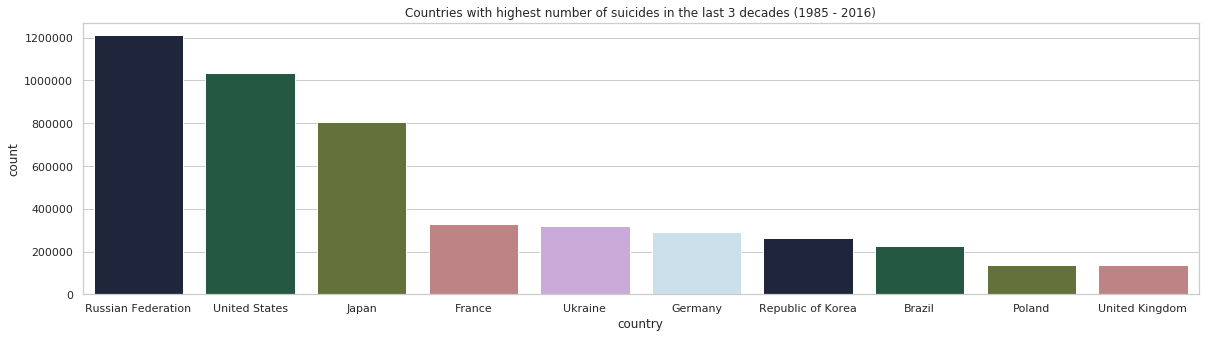

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(y='suicides_no', x='country', data=suic_total.head(10), ax=ax, palette=sns.color_palette('cubehelix'))
plt.title('Countries with highest number of suicides in the last 3 decades (1985 - 2016)')
plt.ylabel('count')

Noticed how the Russian Federation has the highest number of suicide count all over the world? Followed by US, Japan, France, Ukraine, Germany, South Korea, Brazil, Poland, and the UK.

Now let's check the suicide rate whether it will give the same results.

In [12]:
suic_rate = suicides_df[['country','suicides/100k pop']].groupby('country').sum()
suic_rate = suic_rate.reset_index()
suic_rate.sort_values(by=['suicides/100k pop'], ascending=False, inplace=True)
suic_rate.head()

,country,suicides/100k pop
75,Russian Federation,11305.13
52,Lithuania,10588.88
40,Hungary,10156.07
47,Kazakhstan,9519.52
73,Republic of Korea,9350.45


Text(0, 0.5, 'count')

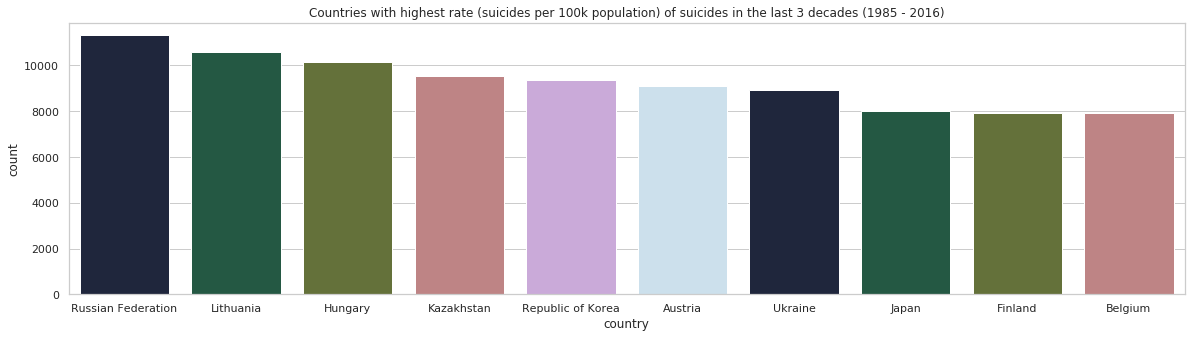

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(y='suicides/100k pop', x='country', data=suic_rate.head(10), ax=ax, palette=sns.color_palette('cubehelix'))
plt.title('Countries with highest rate (suicides per 100k population) of suicides in the last 3 decades (1985 - 2016)')
plt.ylabel('count')

Interestingly, Russia also has the highest suicide rate all over the world. Japan, Korea, and Ukraine are still at the top 10 as well. Lithuania, Hungary, Kazakhstan, Austria, Finland, and Belgium is at the top considering that we are now considering the suicide count relative to the population.

From here on out, we're more interested with the rate. We'll use it for our next graphs by getting the top 10 countries with the highest suicide rate.

In [14]:
top_countries = suic_rate.head(10)['country']
top_countries.reset_index(drop=True)

0    Russian Federation
1             Lithuania
2               Hungary
3            Kazakhstan
4     Republic of Korea
5               Austria
6               Ukraine
7                 Japan
8               Finland
9               Belgium
Name: country, dtype: object

Let's now look at the suicide rate by sex. We can see then the distribution between the suicide rate of males and females.

In [15]:
suic_gender = suicides_df.loc[suicides_df['country'].isin(top_countries)]
suic_gender = suic_gender[['country', 'sex', 'suicides/100k pop']].groupby(['country', 'sex']).sum()
suic_gender = suic_gender.reset_index()
suic_gender.sort_values(by=['suicides/100k pop'], ascending=False, inplace=True)
suic_gender.head()

,country,sex,suicides/100k pop
17,Russian Federation,male,9425.76
13,Lithuania,male,8902.36
7,Hungary,male,7970.00
11,Kazakhstan,male,7802.19
19,Ukraine,male,7434.57


Text(0, 0.5, 'suicide count')

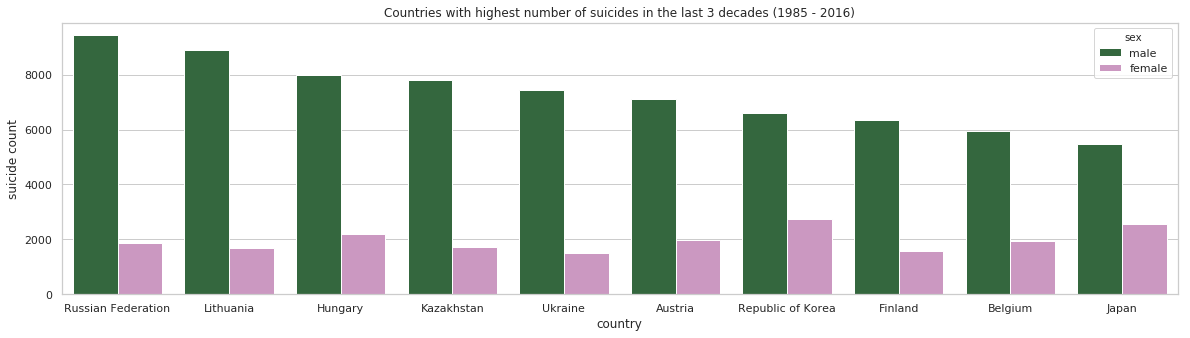

In [16]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(y='suicides/100k pop', x='country', hue='sex', data=suic_gender, ax=ax, palette=sns.color_palette('cubehelix', 2))
plt.title('Countries with highest number of suicides in the last 3 decades (1985 - 2016)')
plt.ylabel('suicide count')

As expected, the suicide rate is higher in males. Several studies have suggested that males are more prone in suicide due to a number of factors like male stereotypes, gender roles, etc.

Next let's check the gender by year..

In [17]:
suic_year = suicides_df.loc[suicides_df['country'].isin(top_countries)]
suic_year = suic_year[['country', 'sex', 'suicides/100k pop', 'year']].groupby(['country', 'sex', 'year']).sum()
suic_year = suic_year.reset_index()
suic_year.sort_values(by=['year', 'suicides/100k pop'], ascending=(True, False), inplace=True)
suic_year.head()

,country,sex,year,suicides/100k pop
32,Austria,male,1985,287.82
95,Belgium,male,1985,240.42
267,Japan,male,1985,192.78
425,Republic of Korea,male,1985,108.36
236,Japan,female,1985,107.69


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


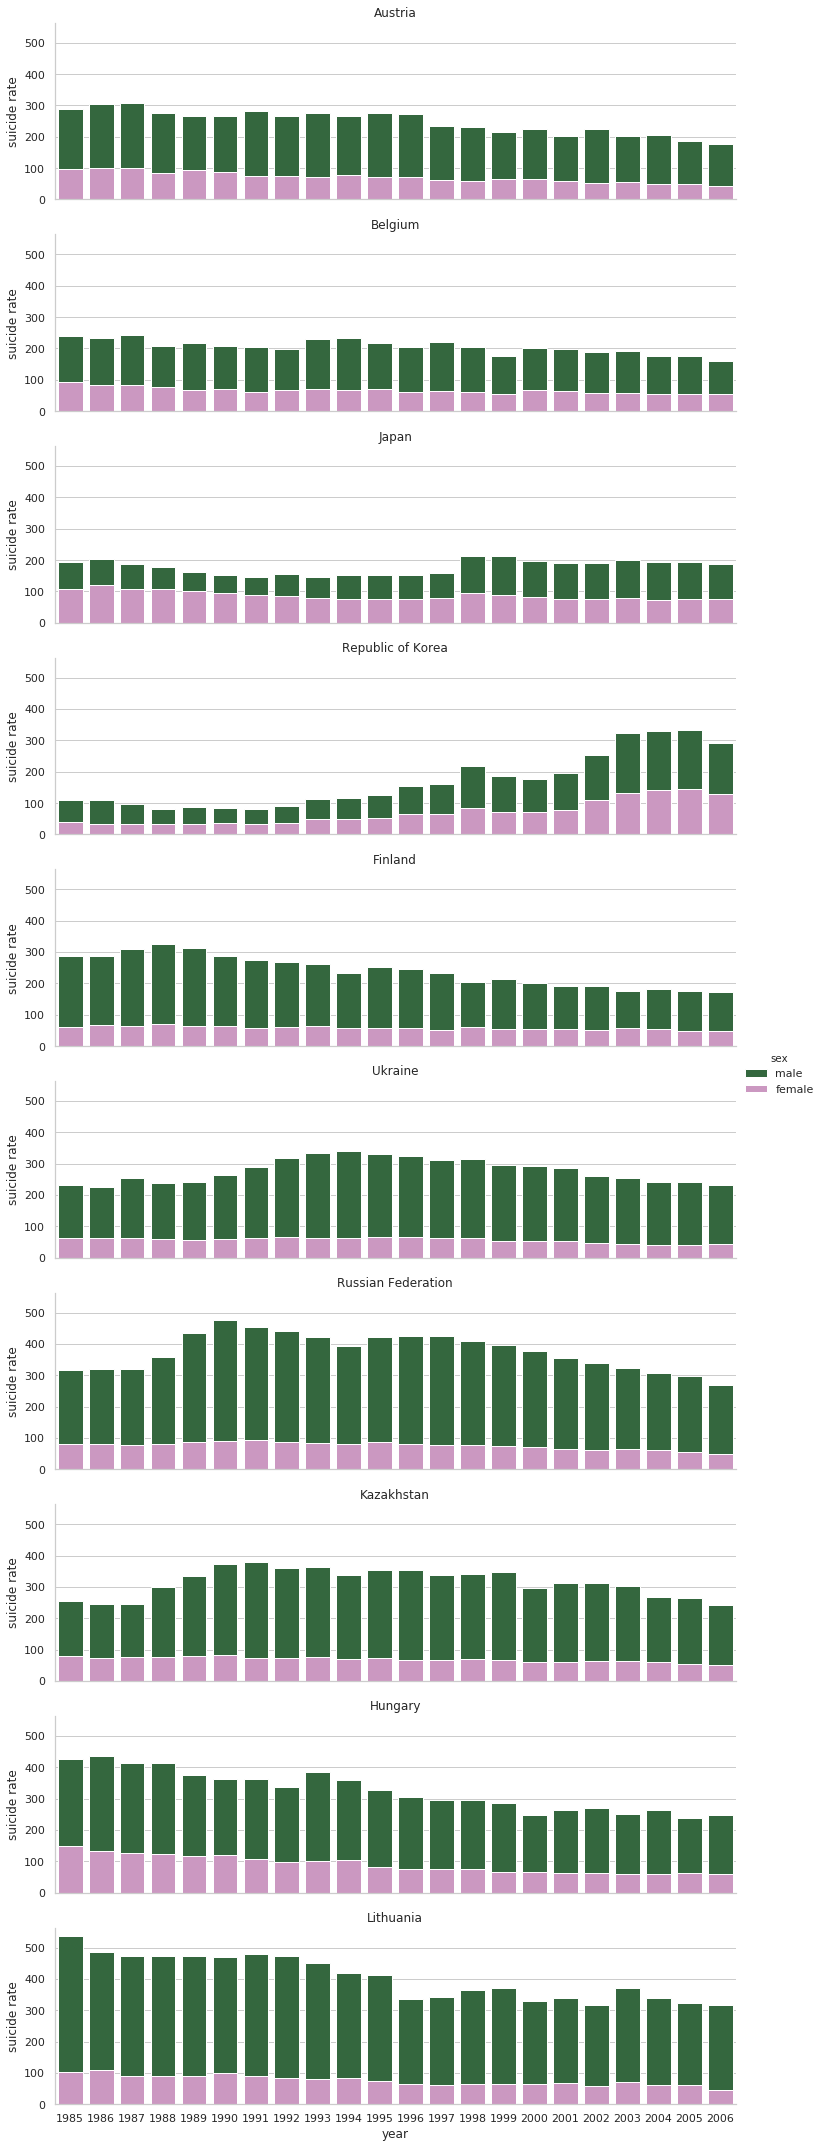

In [18]:
bps = sns.FacetGrid(suic_year, col='country', col_wrap=1, height=3, aspect=3.5, hue='sex', 
                    palette=sns.color_palette('cubehelix', 2))
bps.map(sns.barplot, 'year', 'suicides/100k pop', hue_order='sex')
bps.add_legend()
bps.set_ylabels('suicide rate')
bps.set_xticklabels(suic_year['year'].unique())

axs = bps.axes.flatten()
for i in range(len(suic_year['country'].unique())):
    axs[i].set_title(suic_year['country'].unique()[i])

Again as observed, males are more prone to suicide. Although, Finland from 1985-1997 has either more or equal number of suicides in females than in males. Ukraine almost follows this trend.

Now let's look at by age..

In [19]:
suic_age = suicides_df.loc[suicides_df['country'].isin(top_countries)]
suic_age = suic_age[['country', 'age', 'suicides/100k pop']].groupby(['country', 'age']).sum()
suic_age = suic_age.reset_index()
suic_age['age'] = suic_age['age'].map({'5-14 years': 1, '15-24 years': 2, '25-34 years': 3, 
                        '35-54 years': 4, '55-74 years': 5, '75+ years': 6})
suic_age.sort_values(by=['suicides/100k pop', 'age'], ascending=(False, True), inplace=True)
suic_age.head()

,country,age,suicides/100k pop
47,Republic of Korea,6,4294.26
23,Hungary,6,4247.02
5,Austria,6,3848.07
53,Russian Federation,6,3026.00
38,Lithuania,4,2696.75


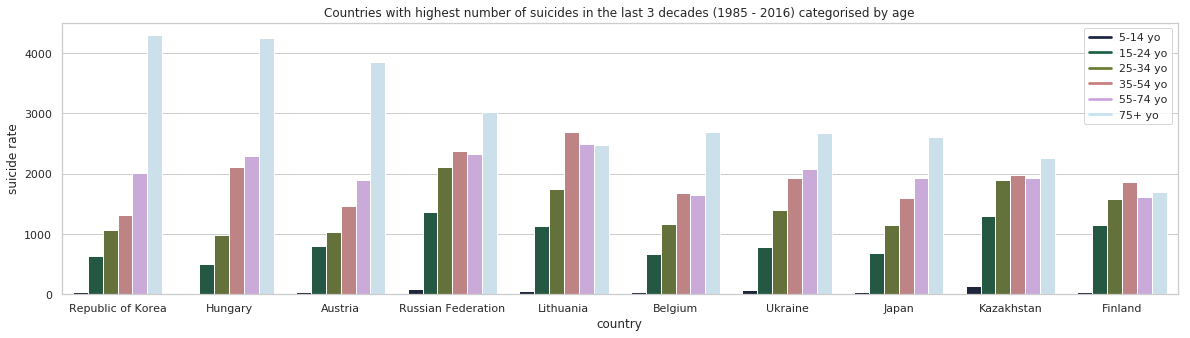

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
colors = sns.color_palette('cubehelix', 6)
sns.barplot(y='suicides/100k pop', x='country', hue='age', data=suic_age, ax=ax, palette=colors)
plt.title('Countries with highest number of suicides in the last 3 decades (1985 - 2016) categorised by age')
plt.ylabel('suicide rate')
plt.legend(labels=['5-14 yo', '15-24 yo', '25-34 yo', '35-54 yo', '55-74 yo', '75+ yo'])

legends = ax.get_legend()
for i in range(len(legends.legendHandles)):
    legends.legendHandles[i].set_color(colors[i])


Almost all of the top 10 countries has 75+ years old of people committing suicide compared to other age groups. Except for Lithuania and Finland though where 35-54 years old age group are higher than the others.

Sadly..we can see that there are about 200 5-14 year olds who commit suicide in Kazakhstan. There are also a number in the same age group in Korea, Austria, Russia, Lithuania, Belgium, Ukraine, Japan, and Finland.

Now let's look at the rate by generation..

In [21]:
suic_gen = suicides_df.loc[suicides_df['country'].isin(top_countries)]
suic_gen = suic_gen[['country', 'generation', 'suicides/100k pop']].groupby(['country', 'generation']).sum()
suic_gen = suic_gen.reset_index()
suic_gen['generation'] = suic_gen['generation'].map({'G.I. Generation': 1, 'Silent': 2, 'Boomers': 3, 
                        'Generation X': 4, 'Millennials': 5, 'Generation Z': 6})
suic_gen.sort_values(by=['suicides/100k pop', 'generation'], ascending=(False, True), inplace=True)
suic_gen.head()

,country,generation,suicides/100k pop
47,Republic of Korea,2.0,4805.90
23,Hungary,2.0,3925.00
41,Lithuania,2.0,3651.08
53,Russian Federation,2.0,3563.49
5,Austria,2.0,3125.49


In [22]:
generations = ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millennials', 'Generation Z']

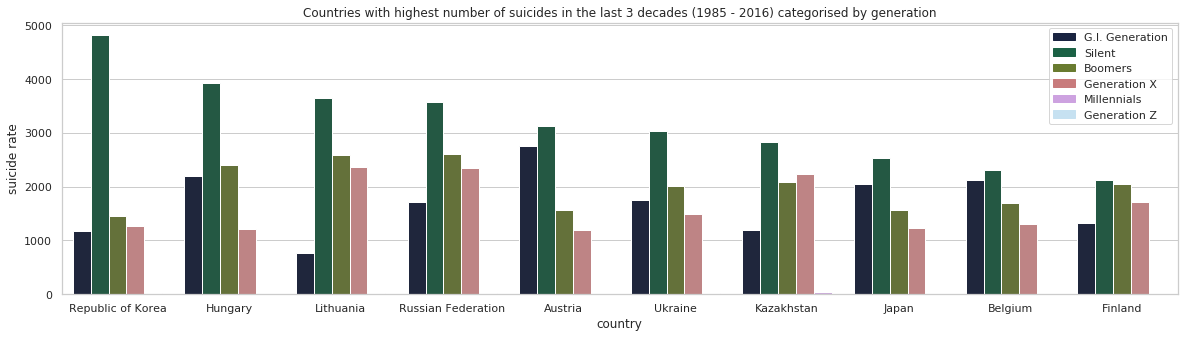

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
colors = sns.color_palette('cubehelix', 6)
sns.barplot(y='suicides/100k pop', x='country', hue='generation', data=suic_gen, ax=ax, palette=colors)
plt.title('Countries with highest number of suicides in the last 3 decades (1985 - 2016) categorised by generation')
plt.ylabel('suicide rate')

boxes = [item for item in ax.get_children() if isinstance(item, matplotlib.patches.Rectangle)][:-1]
legend_patches = [matplotlib.patches.Patch(color=color, label=label) for
                  color, label in zip([item.get_facecolor() for item in boxes], generations)]
plt.legend(handles=legend_patches)

legends = ax.get_legend()
for i in range(len(legends.legendHandles)):
    legends.legendHandles[i].set_color(colors[i])

The Silent generation seems to be the most prone and has the highest count of suicides across the top countries by suicide rate. Although again, Finland has almost the same count for the Silent generation and Boomer generation.

Now let's look at gdp if it's related to the suicide rate.

In [24]:
gdp = suicides_df[['country', 'gdp_per_capita ($)']].groupby('country').sum()
gdp = gdp.reset_index()
gdp.sort_values(by=['gdp_per_capita ($)'], ascending=False, inplace=True)
gdp.head()

,country,gdp_per_capita ($)
53,Luxembourg,25593000
64,Norway,20635056
90,Switzerland,15871404
41,Iceland,15002956
89,Sweden,14806012


In [25]:
top_countries = top_countries.tolist()

In [26]:
top_gdp = gdp.head(25)
clrs = ['red' if (row['country'] in top_countries) else 'grey' for _, row in top_gdp.iterrows()]

Text(0, 0.5, 'gdp')

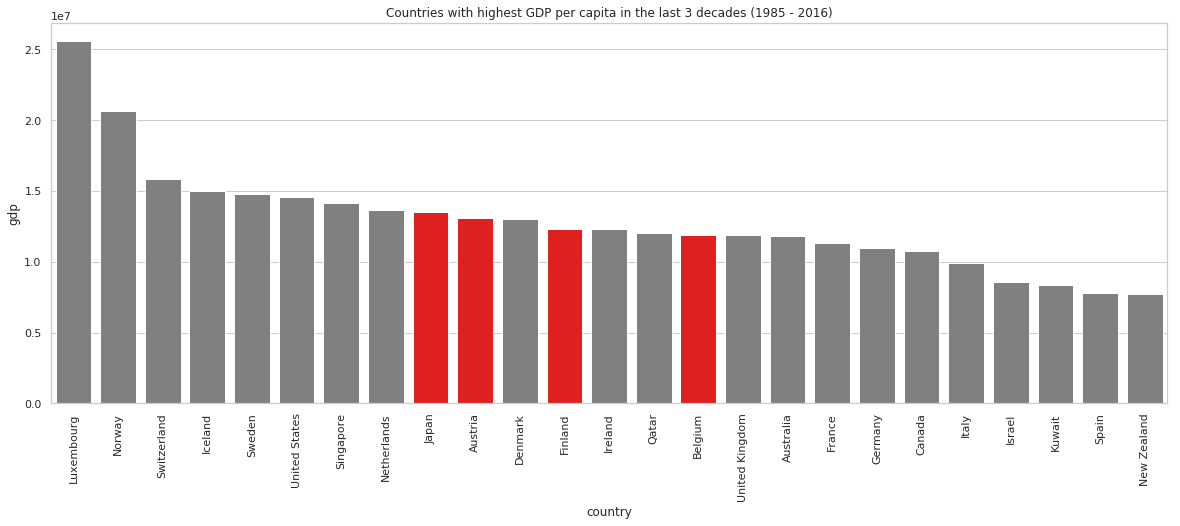

In [27]:
fig, ax = plt.subplots(figsize=(20,7))
bp = sns.barplot(y='gdp_per_capita ($)', x='country', data=top_gdp, ax=ax, palette=clrs)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.title('Countries with highest GDP per capita in the last 3 decades (1985 - 2016)')
plt.ylabel('gdp')

Interestingly, you can see that high GDP per capita shouldn't be related with the suicide rate of a country. If we look at the 25 countries with highest GDPs from 1985-2016, we can see that only Japan, Austria, Finland, and Belgium which is part of the top 10 countries with highest suicide rate are part of the group.